In [140]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

import math

In [141]:

#For printing all the rows & columns in pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dataset Loading


In [142]:
dataset = pd.read_csv('data_mobile_price_range.csv')

In [143]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [144]:
# Dataset Rows & Columns count
dataset.shape

(2000, 21)

 # Dataset Information


In [145]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Duplicate Values


In [146]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()
#dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Missing Values/Null Values


In [147]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [148]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [149]:
# Dataset describe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.00,1238.52,439.42,501.00,851.75,1226.00,1615.25,1998.00
blue,2000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
clock_speed,2000.00,1.52,0.82,0.50,0.70,1.50,2.20,3.00
dual_sim,2000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
fc,2000.00,4.31,4.34,0.00,1.00,3.00,7.00,19.00
four_g,2000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
int_memory,2000.00,32.05,18.15,2.00,16.00,32.00,48.00,64.00
m_dep,2000.00,0.50,0.29,0.10,0.20,0.50,0.80,1.00
mobile_wt,2000.00,140.25,35.40,80.00,109.00,141.00,170.00,200.00
n_cores,2000.00,4.52,2.29,1.00,3.00,4.00,7.00,8.00


**Check Unique Values for each variable.**

In [150]:
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n--------------------------------------------------------------")
  if i in dataset.columns:
    if(dataset[i].nunique() < 25):
      print(f"Unique {i} Values \n{dataset[i].unique()}\n--------------------------------------------------------------")

Unique battery_power's count:1094
--------------------------------------------------------------
Unique blue's count:2
--------------------------------------------------------------
Unique blue Values 
[0 1]
--------------------------------------------------------------
Unique clock_speed's count:26
--------------------------------------------------------------
Unique dual_sim's count:2
--------------------------------------------------------------
Unique dual_sim Values 
[0 1]
--------------------------------------------------------------
Unique fc's count:20
--------------------------------------------------------------
Unique fc Values 
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
--------------------------------------------------------------
Unique four_g's count:2
--------------------------------------------------------------
Unique four_g Values 
[0 1]
--------------------------------------------------------------
Unique int_memory's count:63
--------------------

# 3. Data Wrangling


In [151]:
# remove zero values of pixel resolution height and screen width
dataset = dataset[dataset['sc_w'] != 0]
dataset = dataset[dataset['px_height'] != 0]
dataset.shape

(1819, 21)

In [152]:
# using describe function after removing zero values from the data
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00
mean,1238.03,0.50,1.52,0.50,4.32,0.52,32.16,0.50,140.58,4.53,9.88,647.09,1252.83,2133.47,12.49,6.34,11.01,0.76,0.51,0.51,1.51
std,439.99,0.50,0.81,0.50,4.36,0.50,18.11,0.29,35.44,2.29,6.01,444.74,432.42,1087.49,4.17,4.15,5.46,0.43,0.50,0.50,1.12
min,501.00,0.00,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,0.00,1.00,500.00,256.00,5.00,1.00,2.00,0.00,0.00,0.00,0.00
25%,845.00,0.00,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,5.00,284.00,877.00,1203.50,9.00,3.00,6.00,1.00,0.00,0.00,1.00
50%,1231.00,1.00,1.50,1.00,3.00,1.00,32.00,0.50,141.00,5.00,10.00,562.00,1251.00,2175.00,13.00,6.00,11.00,1.00,1.00,1.00,2.00
75%,1611.00,1.00,2.20,1.00,7.00,1.00,48.00,0.80,170.50,7.00,15.00,952.00,1633.00,3072.50,16.00,9.00,16.00,1.00,1.00,1.00,3.00
max,1998.00,1.00,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,20.00,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.00,1.00,3.00


In [153]:
# Making list of Categorical Variable
categorical_col=['dual_sim', 'blue', 'wifi', 'three_g', 'touch_screen', 'four_g']

In [154]:
# Making list for Numerical Variable
numerical_col=list(set(dataset.columns[:-1])-set(categorical_col))

In [155]:
print(numerical_col)

['talk_time', 'm_dep', 'sc_w', 'fc', 'mobile_wt', 'clock_speed', 'battery_power', 'pc', 'n_cores', 'px_width', 'int_memory', 'sc_h', 'ram', 'px_height']


## 4. Data Vizualization, Storytelling & Experimenting with charts : 

## Understanding the relationships between variables


<Axes: xlabel='price_range', ylabel='count'>

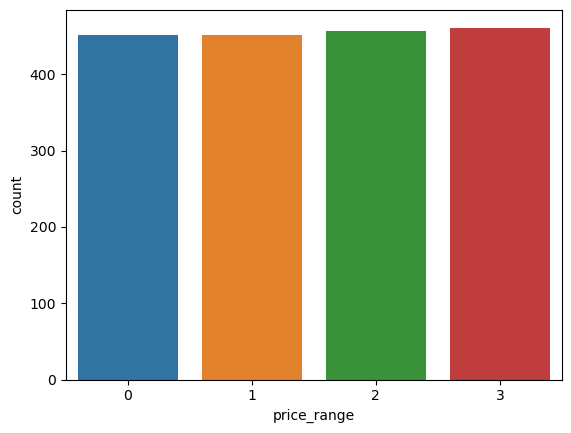

In [156]:
# Chart - 1 visualization code
sns.countplot(x=dataset['price_range'])

**1. Why did you pick the specific chart?**

We picked this chart to get a count of different classes in the price range.

**2. What is/are the insight(s) found from the chart?**

From the above graph we get insights about class imbalance. As from graph we can say that our data doesn't have any class imbalance.

### Chart - 2

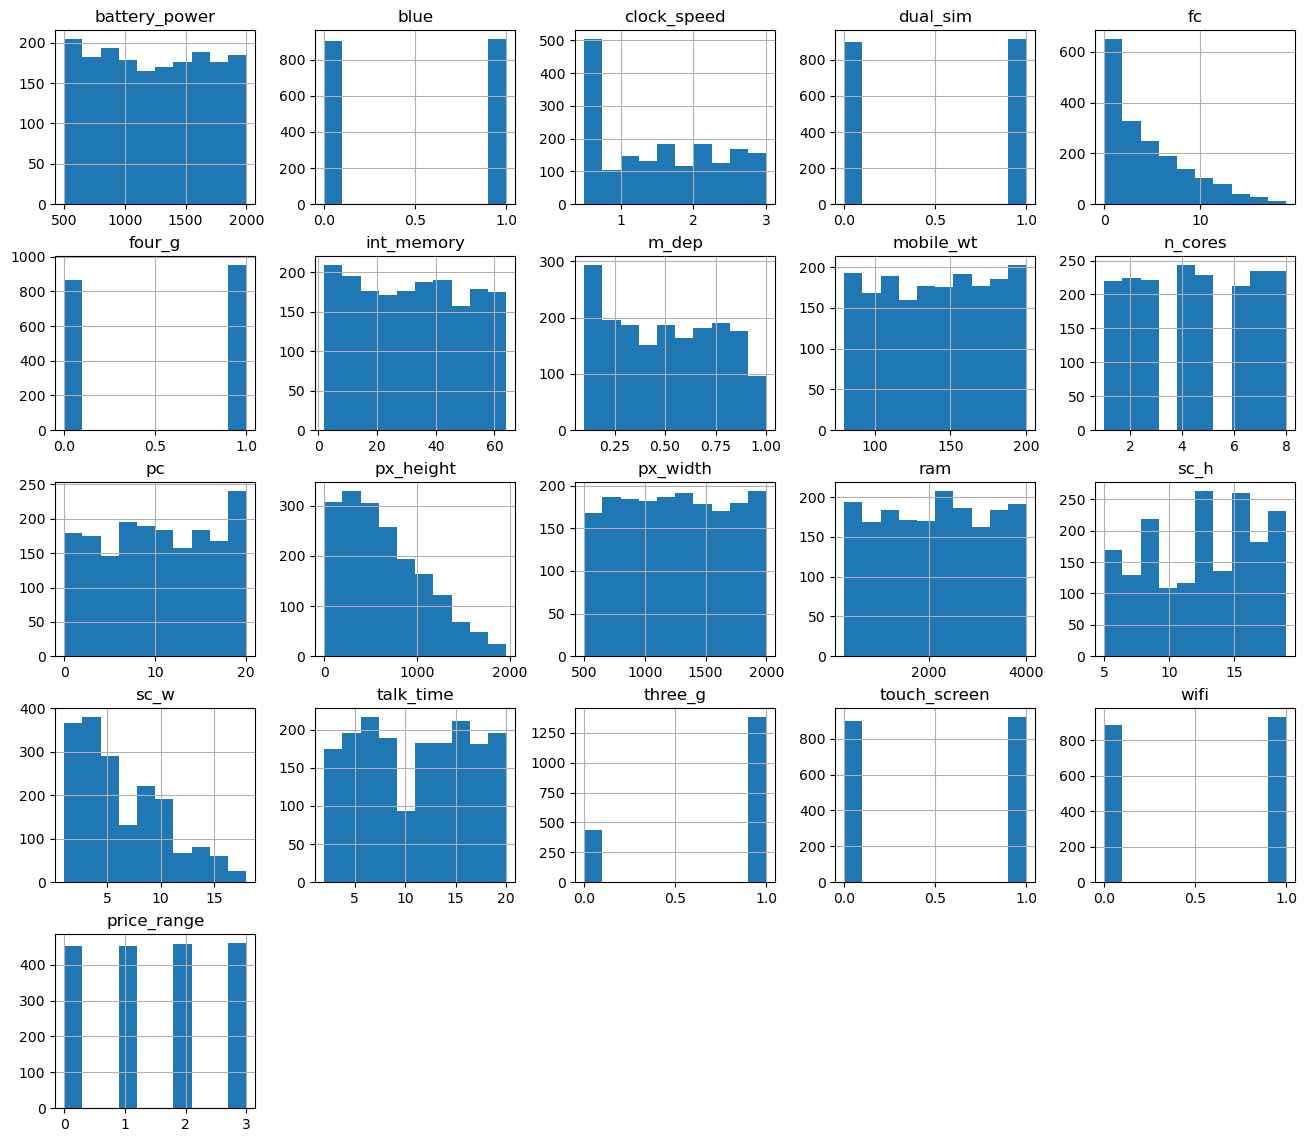

In [157]:
# Chart - 2 Plotting Histogram
hist = dataset.hist(bins=10, figsize=(16,14))

**1. Why did you pick the specific chart?**

We have chosen this graph to get an idea about the distribution of each variable.

**2. What is/are the insight(s) found from the chart?**

Here we can see how data is distributed over the range for numerical and Categorical features.

### Chart - 3

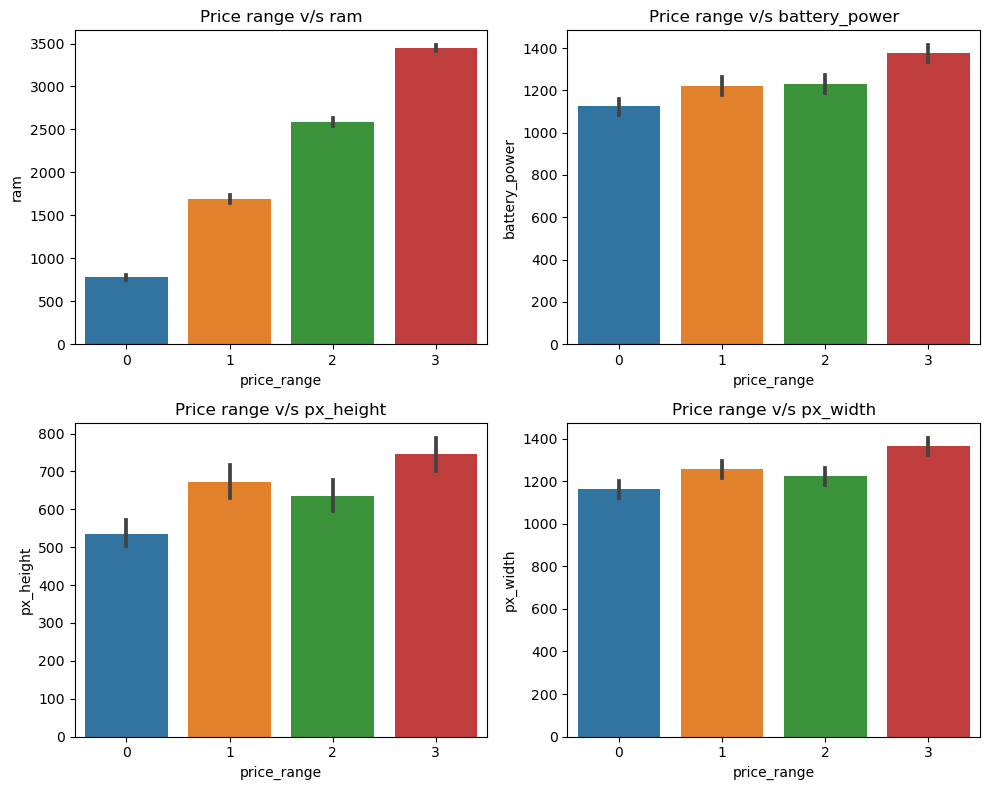

In [158]:
# Chart - 3 visualization code
# plotting  price_range vs other fearures
plt.figure(figsize=(10,8))

variables=['ram','battery_power','px_height','px_width']
counter=1
for var in variables:
  plt.subplot(2,2,counter)
  sns.barplot(x=dataset['price_range'],y=dataset[var])
  plt.title(f'Price range v/s {var}')
  counter+=1
  plt.tight_layout()


**1. Why did you pick the specific chart?**

To get to know about the relation between our target variable (Price range) and independent variables like ram, battery, pixel height and pixel width.

**2. What is/are the insight(s) found from the chart?**

Insights gain from above charts:

As we can see that as a ram increases the price also increases.
Battery power doesn't have much effect on price range.
px_height and px_width don't have any effect over the price of mobile.

### Chart - 4

In [159]:
# Chart - 4 visualization code
group_by_price=dataset.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

In [160]:
group_by_price

blue      dual_sim      four_g      three_g      touch_screen  \
               0    1        0    1      0    1       0    1            0   
price_range                                                                 
0            229  222      229  222    214  237     111  340          212   
1            228  223      223  228    216  235     113  338          214   
2            232  224      233  223    230  226     104  352          237   
3            214  247      216  245    205  256     107  354          233   

                 wifi       
               1    0    1  
price_range                 
0            239  229  222  
1            237  213  238  
2            219  227  229  
3            228  216  245

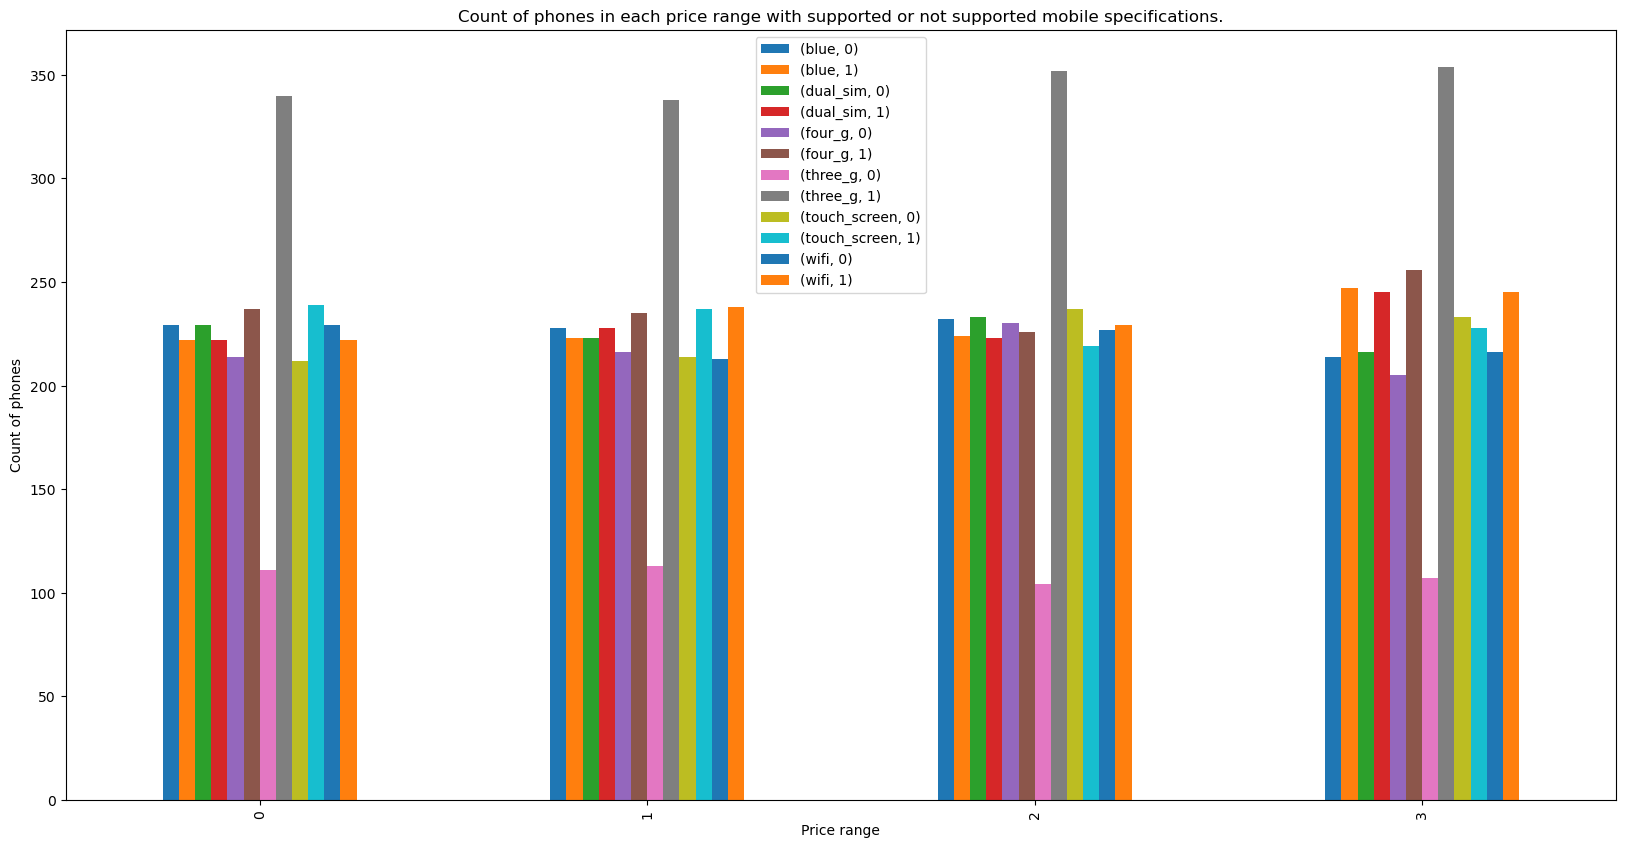

In [161]:
group_by_price.plot.bar(figsize=(20,10))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

**1. Why did you pick the specific chart?**

We choose this chart to visualize relation between our target variable (Price range) and Categorical features like Bluetooth, dual sim, 4G, 3G, touch screen and wifi.

**2. What is/are the insight(s) found from the chart?**

So from the above chart we can see that each class has almost the same kind of feature in it. We can say that these features are not affecting the price range of our mobile.

### Chart - 5

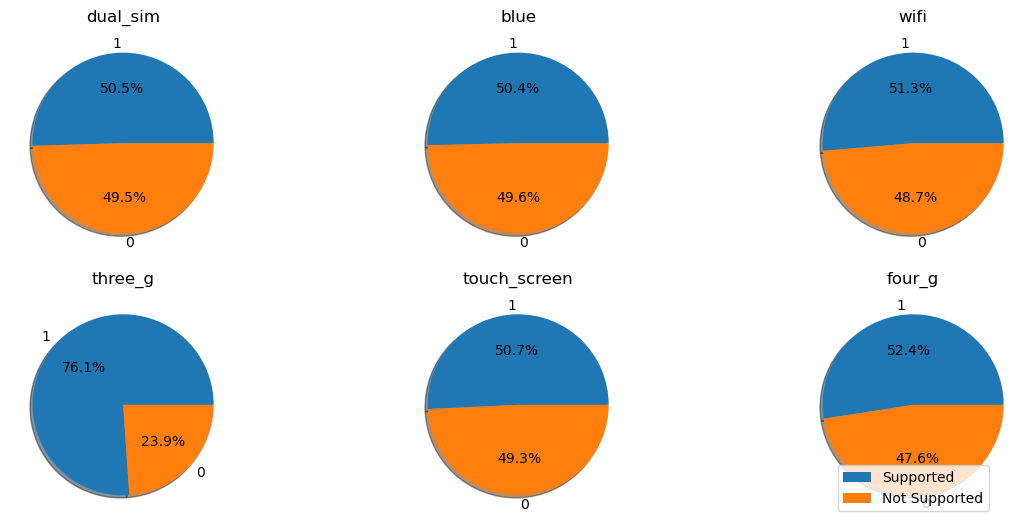

In [162]:
plt.figure(figsize=(12,8))

categorical_col=['dual_sim', 'blue', 'wifi', 'three_g', 'touch_screen', 'four_g']
counter=1
for var in categorical_col:
  plt.subplot(3,3,counter)
  plt.pie(dataset[var].value_counts(),labels=('1','0'),autopct='%1.1f%%',shadow=True)
  plt.title(var)
  counter+=1
  plt.tight_layout()

plt.legend(('Supported','Not Supported'), loc="lower center")


**1. Why did you pick the specific chart?**

We used pie chart to get visualization of features present in our mobile.

**2. What is/are the insight(s) found from the chart?**

By looking at chart we can say that our half number of devices support all the features while half doesn't, except the feature 'three_g' where most of the devices have three_g feature in it.

### Chart - 6

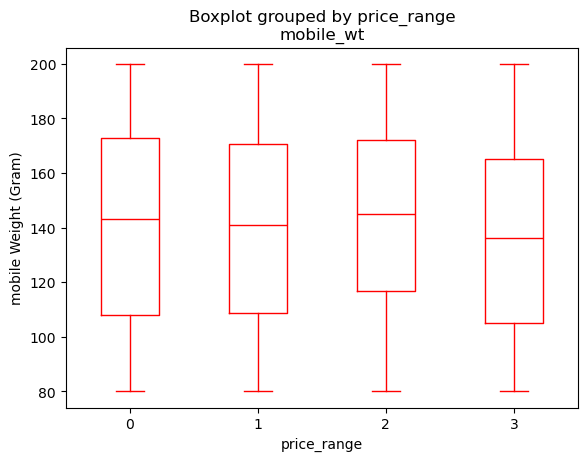

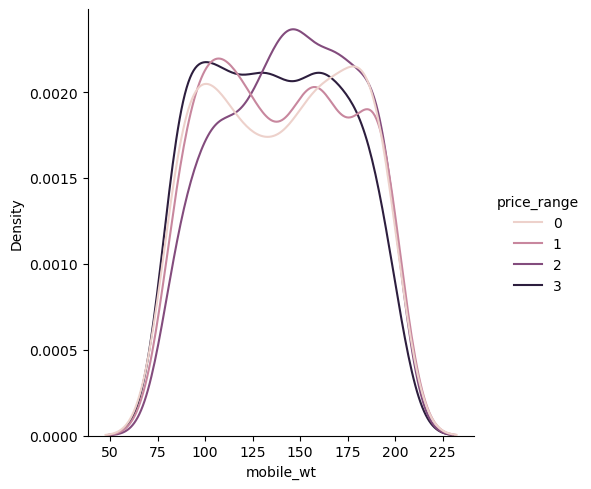

In [163]:

# Chart - 6 visualization code
dataset.boxplot(by ='price_range', column =['mobile_wt'], grid = False,color='red'),
plt.ylabel("mobile Weight (Gram)")

sns.displot(data=dataset, x="mobile_wt", hue="price_range", kind="kde")

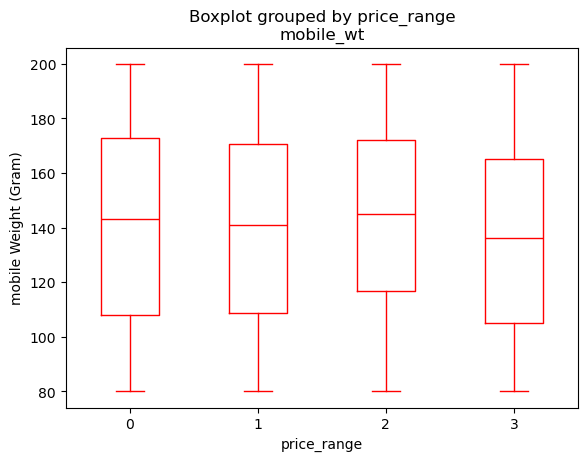

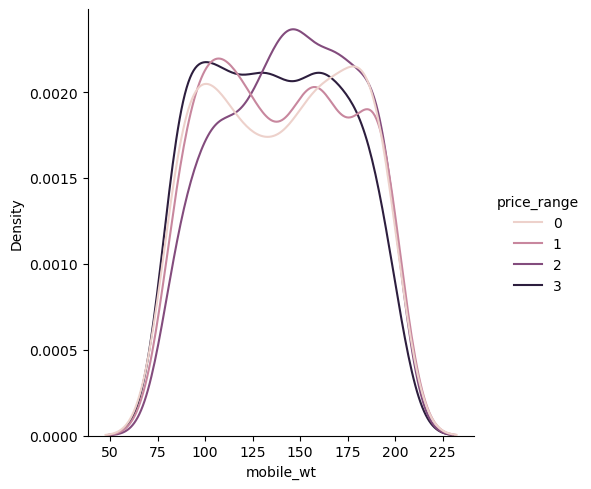

In [164]:

# Chart - 7 visualization code
dataset.boxplot(by ='price_range', column =['mobile_wt'], grid = False,color='red'),
plt.ylabel("mobile Weight (Gram)")

sns.displot(data=dataset, x="mobile_wt", hue="price_range", kind="kde")

### Chart - 7 - Correlation Heatmap

<Axes: >

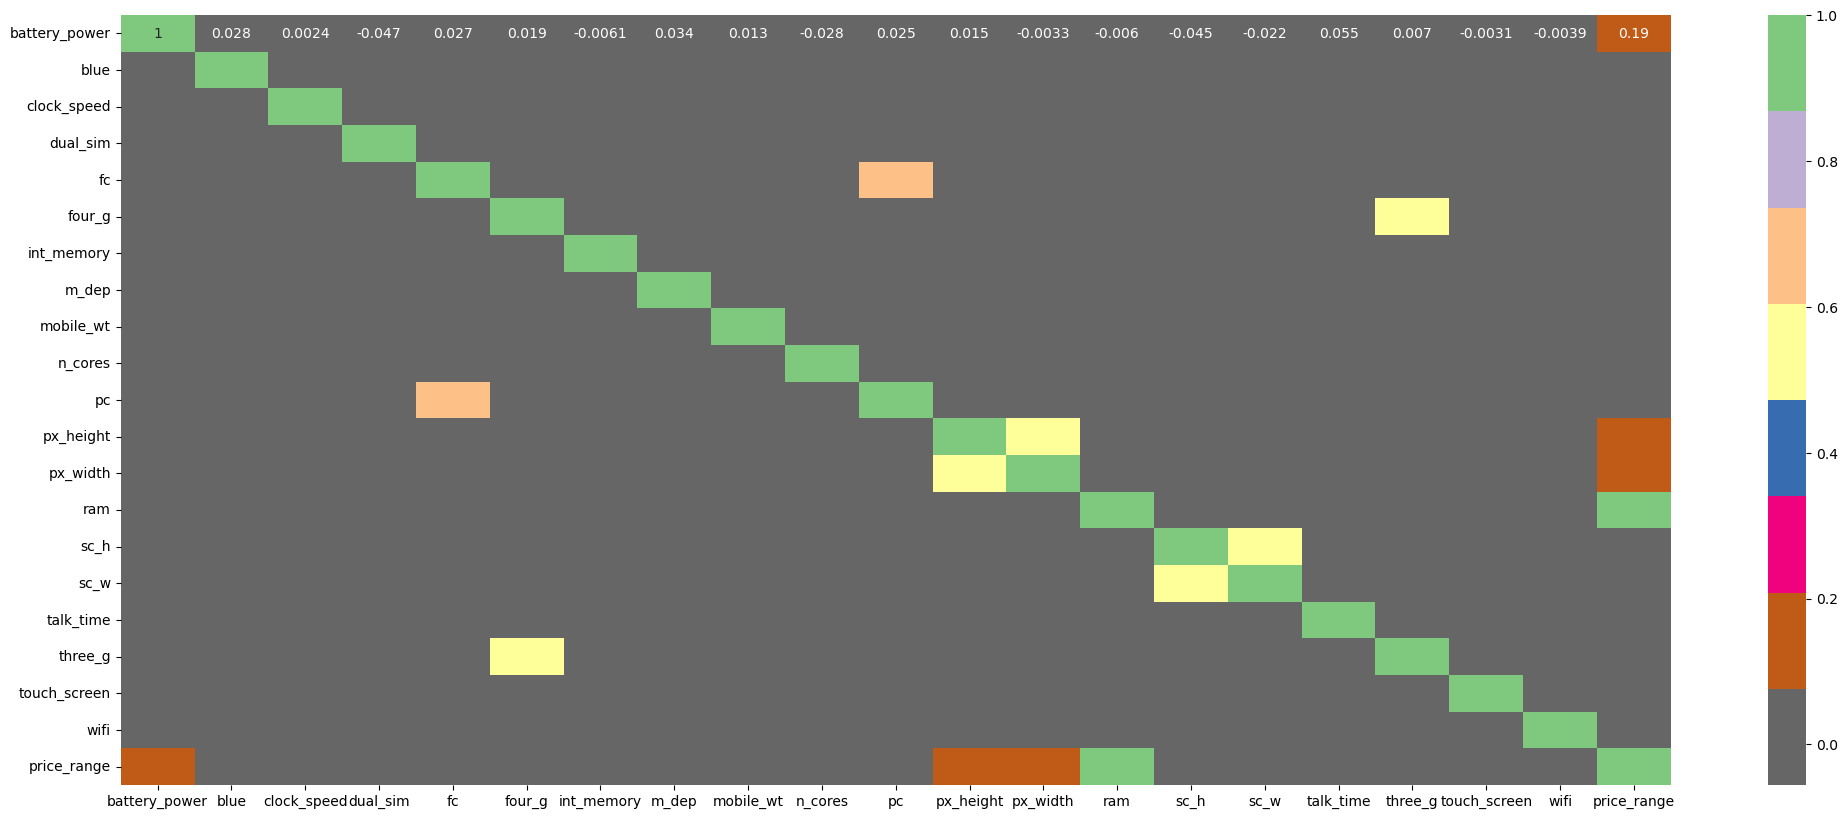

In [165]:
#Correlation Heatmap
corr=dataset.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

**1. Why did you pick the specific chart?**

To check correlation in our dataset

**2. What is/are the insight(s) found from the chart?**

Here we can see that ram is highly correlated with price range. There are some features which are correlated with each other like (3G and 4G) and (px_height and px_width). Also front camera and Back camera are also correlated with each other. Overall we can say that there is not a problem of multicollinearity.

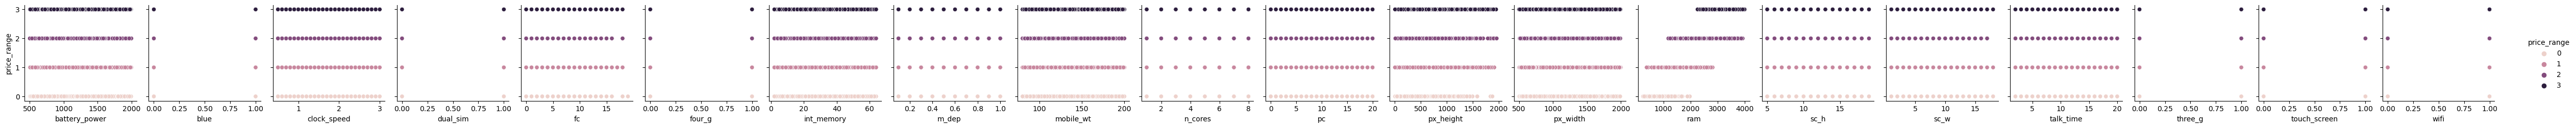

In [168]:
# Pair Plot visualization code
numeric_col = ['battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
               'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
sns.pairplot(dataset, hue='price_range',y_vars = 'price_range')
plt.show()

## 5. Hypothesis Testing

### Hypothetical Statement - 1

**H0(null hypothesis): There is no significant difference in the mobile price range with respect to average ram.**

**H1(alternate hypothesis): There is significant difference in the mobile price range with respect to average ram.**

## 2. Performing an appropriate statistical test.

In [169]:
# Creating separate variable for ram based on lower & higher price range

low_range_phones_ram = dataset[dataset['price_range'] == 0]['ram']
high_range_phones_ram = dataset[dataset['price_range'] == 3]['ram']

# Two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_ram, b=high_range_phones_ram,equal_var=True)

# #95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

We are rejecting null hypothesis


**We have done Two sample T-test to obtain P-Value**

A two-sample t-test is a statistical test used to compare the means of two different samples to determine if there is a significant difference between them.

## Hypothetical Statement - 2

H0(null hypothesis): There is no significant dependency between the mobile price range and 4G connectivity.

H1(alternate hypothesis): There is significant dependency between the mobile price range and 4G connectivitest.

## 2. Perform an appropriate statistical test.

In [170]:
# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(dataset['price_range'], dataset['four_g'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

We are accepting null hypothesis


We have done Pearson’s Chi-Square Test 
 t to obtain P-V

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying. Therefore, a chi-square test is an excellent choice to help us better understand and interpret the relationship between our two categorical variables.ue**


## 6. Feature Engineering & Data Pre-processing

In [171]:
#Finding P and F-values of all the avaliable variables
from sklearn.feature_selection import SelectKBest,f_classif
df_copy = dataset.copy()
y=df_copy.pop('price_range')
X = df_copy
#for selecting 5 best features from dataset
feature_selector = SelectKBest(f_classif,k=10) 
fit=feature_selector.fit(X,y)

In [172]:
# Perform Statistical Test to obtain P-Value

#Storing results in dataframe 
p_values=pd.DataFrame(fit.pvalues_)
f_score=pd.DataFrame(fit.scores_)
input_variable_names=pd.DataFrame(X.columns)

#Concating two dataframe
summary_stats=pd.concat([input_variable_names,p_values,f_score],axis=1)
summary_stats.columns=['input_variable','p_value','f_score']

#Selecting values based on 90% confidence interval.
selected_variable=summary_stats.loc[(summary_stats['p_value']<=0.1)]
selected_variable.sort_values(by='f_score',ascending = True,inplace=True)
selected_variable

,input_variable,p_value,f_score
9,n_cores,0.06,2.52
6,int_memory,0.04,2.82
8,mobile_wt,0.02,3.16
12,px_width,0.00,18.17
11,px_height,0.00,18.27
0,battery_power,0.00,26.23
13,ram,0.00,3202.97


In [173]:
# Selecting independent variables based on p-value
X = df[selected_variable.input_variable]
y = df['price_range']

In [174]:
#Printing all the selected feature
X.head()

,n_cores,int_memory,mobile_wt,px_width,px_height,battery_power,ram
0,2,7,188,756,20.00,842,2549
1,3,53,136,1988,905.00,1021,2631
2,5,41,145,1716,1263.00,563,2603
3,6,10,131,1786,1216.00,615,2769
4,2,44,141,1212,1208.00,1821,1411


**We have used sklearn.feature_selection module for feature selection/dimensionality reduction on dataset, to improve estimators accuracy scores and to boost their performance on very high-dimensional datasets.**

We have checked p-value for all independent variables and removed features which are having confidence interval below 90%.

### 5. Data Transformation

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]


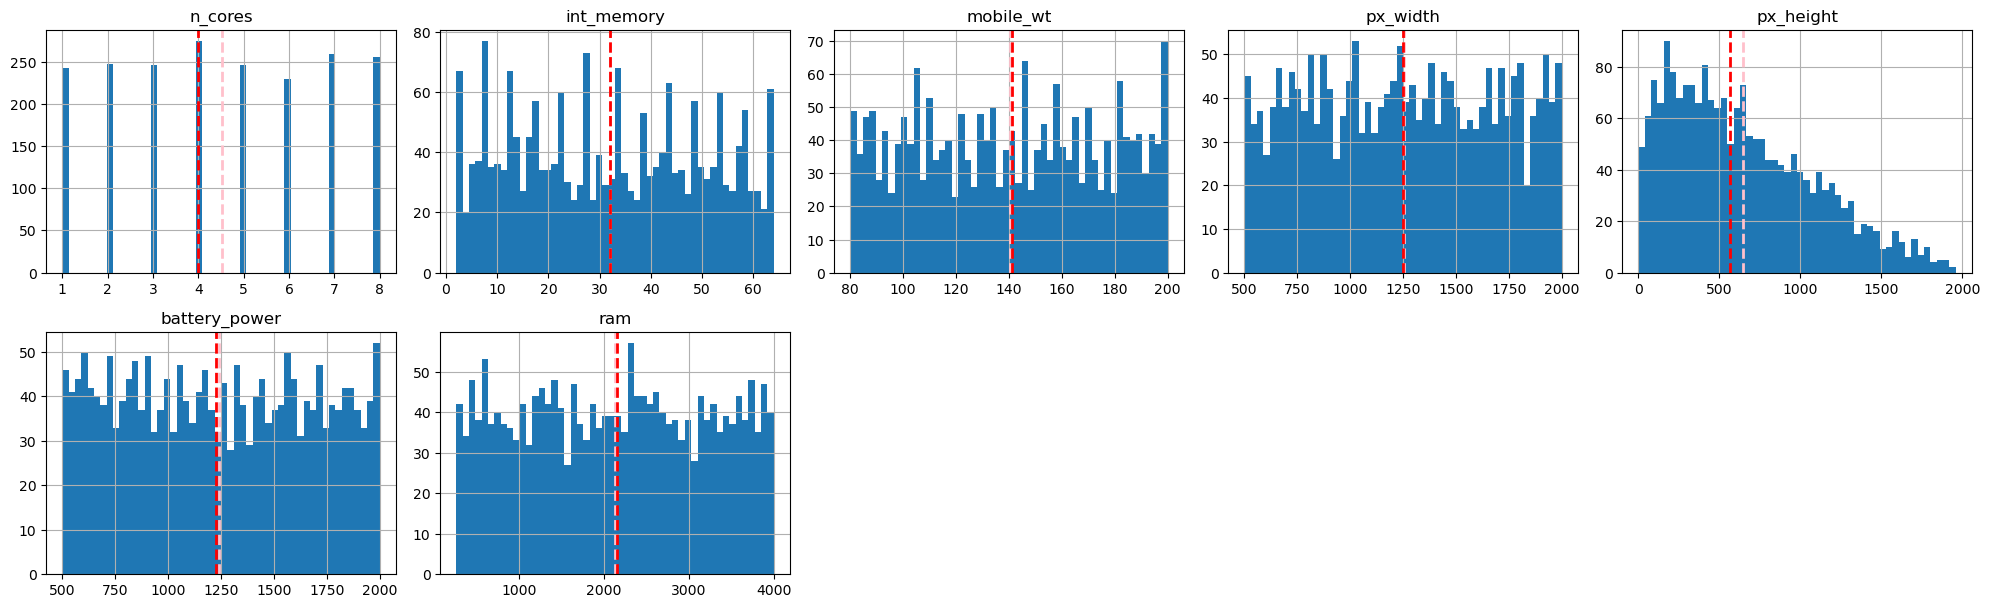

In [175]:
# Transform Your data
#plotting histogram to check distribution of data in columns
rows=5
cols=5
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns): 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

## 6. Data Scaling

In [178]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

#Creating object 
scaler = StandardScaler()

#Fit on data
X_scaled=scaler.fit_transform(X)

In [179]:
#converting to dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)

StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

**7. Dimesionality Reduction**

 We have used sklearn.feature_selection module for feature selection/dimensionality reduction

 Already done in feature selection part

## 8. Data Splitting

In [180]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_scaled_df,y , test_size = 0.2, random_state = 0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600,)
(400,)


**We have splitted 80% of dataset into training data and 20% into testing data.**

**Dataset is already balanced**

## 7. ML Model Implementation

### KNN Model

In [197]:
# Applying KNN Model
model_knn={'KNN':KNeighborsClassifier()}
model_knn,knn_score,knn_report=fit_and_score(model=model_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [198]:
#Storing model scores
model_scores=pd.concat([model_scores, knn_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77


In [199]:
print(knn_report['KNN'])

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        95
           1       0.67      0.65      0.66        92
           2       0.70      0.70      0.70        99
           3       0.90      0.84      0.87       114

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



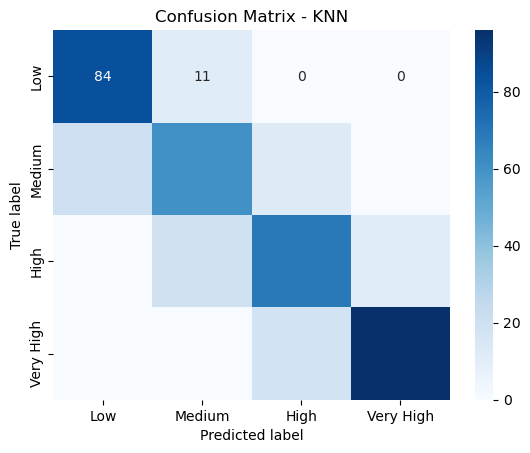

In [200]:
#Confusion Matrix for knn
conf_matrix(model=model_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### 2. Cross- Validation & Hyperparameter Tuning


In [201]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,35)

#Setup knn instance
knn=model_knn['KNN']

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #Fit the algorithm
  knn.fit(X_train,y_train)

  #Update the training score list
  train_scores.append(knn.score(X_train,y_train))

  #Update test score list
  test_scores.append(knn.score(X_test,y_test))
     

Maximum KNN score on the test data : 80.75%


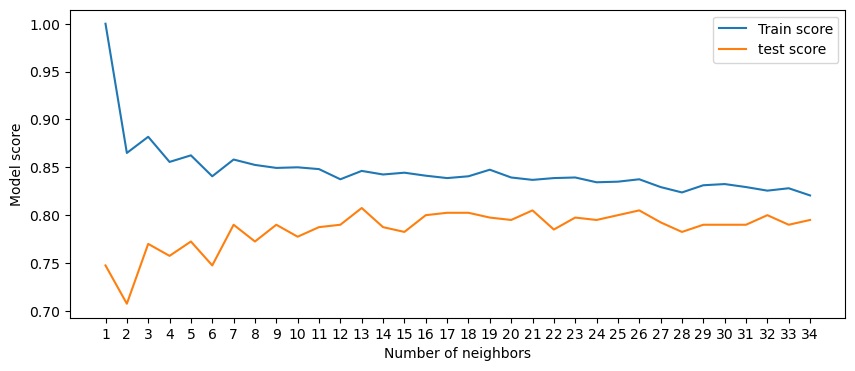

In [202]:
#Lineplot of test score and train score for different value of neighbours
plt.figure(figsize=(10, 4))
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xticks(np.arange(1,35,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [203]:

 #Implementing tuned model
model=knn.set_params(n_neighbors=24)   
tuned_knn=model.fit(X_train,y_train)

#Predicting with tuned model
y_preds=model.predict(X_test)

#Dictionary for storing scores
model_scores_knn={'Accuracy':model.score(X_test,y_test),'Precision':precision_score(y_test,y_preds,average='weighted'),
                'Recall':recall_score(y_test,y_preds,average='weighted'),'F1 score': f1_score(y_test,y_preds,average='weighted')}

#converting dictionary to dataframe               
model_score_df=pd.DataFrame([model_scores_knn]).rename(index={0:'Tuned KNN'})

In [204]:
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77


In [205]:
#Storing model scores
model_scores=pd.concat([model_scores, model_score_df], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77
Tuned KNN,0.80,0.80,0.80,0.80


In [206]:
# ML Model - 3 Implementation

#creating instance of model and storing it in dictionary
model_rf={'Random Forest':RandomForestClassifier()}

#Implementing random forest and creating classification report
model_rf,rf_score,rf_report=fit_and_score(model=model_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)


In [209]:
#Storing model scores
model_scores=pd.concat([model_scores, rf_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77
Tuned KNN,0.80,0.80,0.80,0.80
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91


In [210]:
print(rf_report['Random Forest'])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.89      0.89      0.89        92
           2       0.87      0.82      0.84        99
           3       0.92      0.95      0.94       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



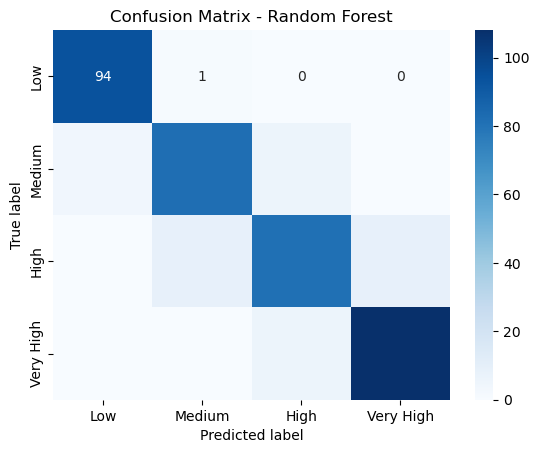

In [211]:
#Confusion matrix for random forest classifier
conf_matrix(model=model_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### 2. Cross- Validation & Hyperparameter Tuning

In [212]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Parameter grid for random forest
rf_grid = { 
    'n_estimators': [250,300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,12,14],
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

#hyperparamter tuning using randomized search cv
best_parameters_rf,model_rf_tuned,clf_report_rf,tuned_rf_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                       model_name=model_rf,
                                                                       parameter_grid=rf_grid,X_train=X_train,X_test=X_test,
                                          y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [213]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_rf_scores], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77
Tuned KNN,0.80,0.80,0.80,0.80
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Tuned Random Forest,0.90,0.90,0.91,0.90


In [214]:
#Best parameters for random forest
best_parameters_rf[0]

,best_parameter,Random Forest Accuracy
criterion,entropy,0.90
max_depth,14,0.90
max_features,auto,0.90
min_samples_leaf,1,0.90
min_samples_split,5,0.90
n_estimators,300,0.90


In [215]:
#Printing classification report of random forest classifier
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.87      0.88      0.88        92
           2       0.84      0.81      0.82        99
           3       0.93      0.94      0.93       114

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.91      0.90       400



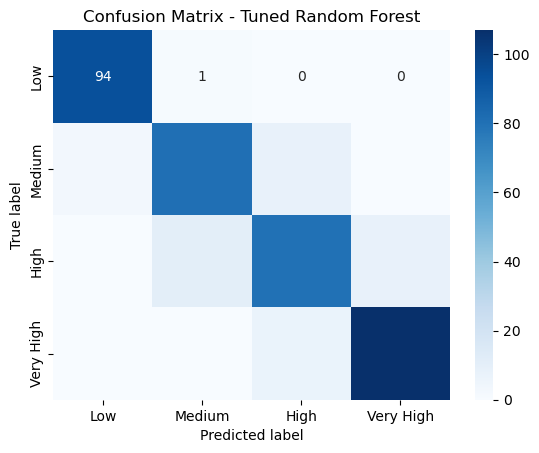

In [216]:
#Confusion matrix of tuned model
conf_matrix(model={'Tuned Random Forest': model_rf_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

### SVM MODEL

In [217]:
#Implementing SVM 
model_svm={'SVM': svm.SVC()}
model_svm,svm_score,svm_report=fit_and_score(model=model_svm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)


In [219]:
#Storing model scores
model_scores=pd.concat([model_scores, svm_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77
Tuned KNN,0.80,0.80,0.80,0.80
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Tuned Random Forest,0.90,0.90,0.91,0.90
SVM,0.93,0.93,0.93,0.93
SVM,0.93,0.93,0.93,0.93


In [220]:

#Printing classification report for SVM
print(svm_report['SVM'])

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.92      0.90      0.91        92
           2       0.92      0.88      0.90        99
           3       0.95      0.95      0.95       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



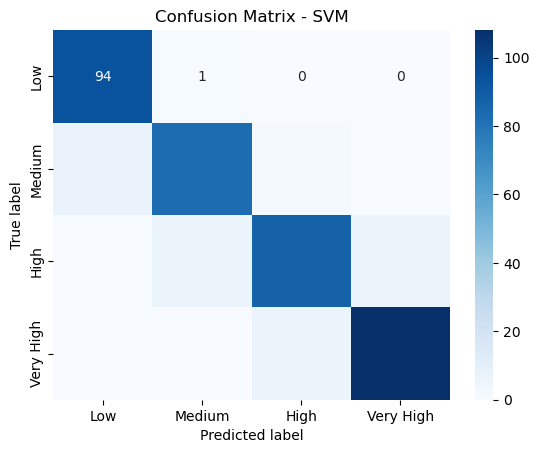

In [221]:
#Confusion matrix for SVM
conf_matrix(model=model_svm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [222]:
#Hyperparameter tuning for SVM
svm_grid = {'C': range(70,80,1), 
              'gamma': [0.01,0.05,0.1,0.2],
              'kernel': ['linear','rbf','poly','sigmoid']}

best_parameters_svm,model_svm_tuned,clf_report_svm,tuned_svm_score=Hyper_parameter_tuning(grid_search=True,random_search=False,model_name=model_svm,parameter_grid=svm_grid,X_train=X_train,X_test=X_test,
                                                           y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [223]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_svm_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77
Tuned KNN,0.80,0.80,0.80,0.80
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Tuned Random Forest,0.90,0.90,0.91,0.90
SVM,0.93,0.93,0.93,0.93
SVM,0.93,0.93,0.93,0.93


In [224]:
#best parameters for svm
best_parameters_svm[0]

,best_parameter,SVM Accuracy
C,72,0.98
gamma,0.01,0.98
kernel,linear,0.98


In [225]:
#Classification report for tuned svm
print(clf_report_svm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       0.98      0.97      0.97        92
           2       0.95      0.96      0.95        99
           3       0.98      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.97      0.98       400



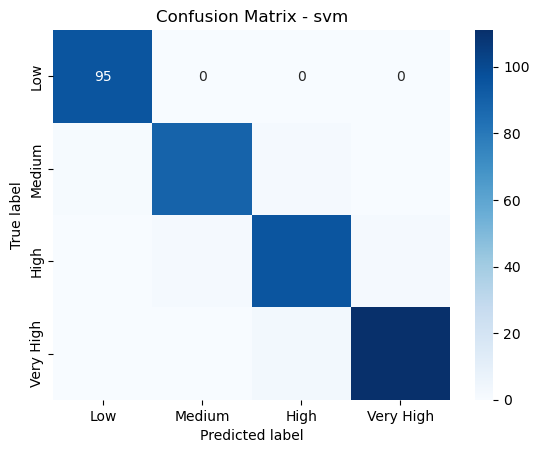

In [226]:
#Confusion matrix of tuned model
conf_matrix(model={'svm': model_svm_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [227]:
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.96,0.97,0.96,0.96
Tuned Logistic Regression,0.98,0.97,0.97,0.97
KNN,0.77,0.77,0.77,0.77
Tuned KNN,0.80,0.80,0.80,0.80
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Random Forest,0.91,0.91,0.91,0.91
Tuned Random Forest,0.90,0.90,0.91,0.90
SVM,0.93,0.93,0.93,0.93
SVM,0.93,0.93,0.93,0.93


## 
Conclusions from ED:

A
Phones which are not having 3G don't have 4G connectivity as well.

Phones which are not having Primary cam don't have front cam as well.

Low price phones mostly fall under Rambin 1GB & very high cost phones fall under rambin of 3GB to 4GB.

Adequate amount of ram should be in lower range phones too for stabilized performance of phone which can effect the brand image in a positive way.

Very high cost phones have larger screen area & pixel area as well, resulting in better screen quality.

Very high cost phones have larger battery size & mobile weight is lowest.

There are many phones with no front cam through out all price ranges, atleast it should be present in all very high cost phones.